# **Week 2**
### Josh Winnes
### Topics in Data Science
### September 10, 2024
##### (Due: Tuesday, September 17)

---
---

## **Data Setup**

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys

# Specify the path to the directory containing your script
script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages'
sys.path.append(script_directory)

# Now you can import your script
import dhs_util
from dhs_util import * 

os.chdir('/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/data')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')

df = dhs_preprocessing(df)
df, service_map = add_service_label(df)
df = add_age_bin(df)

recipient = get_recipient_attribute(df)

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(


In [203]:
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9


In [204]:
recipient.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
12,2,1,1,2021-02-28,2021-02-28,1,1,70,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,99~Unknown,S12,70-79
13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49


---
---

## **In Class Exercises**

### ***Tuesday, September 10, 2024***

### Exercise 1: How many recipients receive services every month in the year? 

In [205]:
recipient.query("distinct_month == 12 and num_service > 0").count()

id                  421900
num_service         421900
distinct_service    421900
first_date          421900
last_date           421900
num_month           421900
distinct_month      421900
age                 421900
gender              421900
race                421900
ethnicity           421900
marital             421900
education           421900
serv                421900
age_bin             421900
dtype: int64

We see that **421,900** recipients receive at least 1 service in every month.

### Exercise 2: What is the average number of services a recipient use? 

In [206]:
recipient['num_service'].mean()

13.331111523251261

Recipients use, on average, **13.331** services

### Exercise 3: If we remove the recipients who uses only one service in the year, what are the answers to the above questions?

In [207]:
recipient_more_than_one = recipient.query("num_service != 1").reset_index()
recipient_more_than_one.head()

,index,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
1,13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
2,24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
3,28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49
4,40,6,24,3,2021-01-31,2021-12-31,24,12,71,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S09,70-79


In [208]:
recipient_more_than_one.query("distinct_month == 12 and num_service > 0").count()

index               421900
id                  421900
num_service         421900
distinct_service    421900
first_date          421900
last_date           421900
num_month           421900
distinct_month      421900
age                 421900
gender              421900
race                421900
ethnicity           421900
marital             421900
education           421900
serv                421900
age_bin             421900
dtype: int64

There are still **421,900** recipients who receive services every month, which makes sense because if they receive service every month, then they would have more than 1 service in the year and would not have been dropped.

In [209]:
recipient_more_than_one['num_service'].mean()

13.631203741194396

The mean jumped slightly to **13.631** services per recipient when we ignore the recipients who only received 1 service.

### Exercise 4: From all the plots, can we conclude that there is little difference in the number of services used between different age/gender/race groups?

---

### ***Thursday, September 12, 2024***

### Exercise 1: Build you own module of helper functions, store in file, and import into your main notebook for use

In [210]:
script_directory = '/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages'
sys.path.append(script_directory)

import week2_util
from week2_util import *

In [211]:
def get_sum_associated_servs(cohort_services):
    
    df_temp_cohort = cohort_services.groupby(["id","serv"]).agg(
    num_serv = ('service', 'nunique') # this will be 1 or 0, "service" is categorical 
    ).reset_index()

    df_serv_cohort = df_temp_cohort.pivot_table(
    values='num_serv', 
    index=["id"], columns="serv", aggfunc=np.sum
    ).reset_index()

    list_cohort_servs = pd.DataFrame(df_serv_cohort.iloc[:,1:22].sum())
    list_cohort_servs.columns = ['count']
    return list_cohort_servs

### Exercise 2: Think about the behavior cohorts
- can we conclude that income services combined with other services helps recipients reduce their reliance on income support overtime?
- does the conclusion make sense? i.e., can the conclusions be reasonably explained by cross validation with other data view? 
 

Honestly, I don't think that we can conclude that income services combined with other services helps recipients reduce their reliance on income support over time because it looks like the n

### Exercise 3: Check out pandas.crosstab https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html#pandas.crosstab , see if you can prodce a table with service as row and race and gender as columns 

---
---

## **Homework**

### Exercise 1
- Choose a pair or multiple behavior cohorts of recipients based on a set of behavior criteria that you think may be of importance (to the works done at DHS)
    - e.g., recipients who received mental health service (S14) vs. those who did not
    - e.g., recipients who received mental health service AND income support vs. those who received mental health support only (or the other way around) etc. 


In [212]:
for i in df['service'].unique(): print(i)

Children_Attending_Early_Childhood_Programs_Managed_by_DHS
Children_in_Care
Children_Receiving_Child_Welfare_Services
Children_Receiving_DHS_Funded_Out_of_School_Programs
Children_Receiving_Early_Intervention_Services
Families_Receiving_Child_Welfare_Services
Homeless_Population
Homicides
Individuals_Receiving_DHS_Services
Individuals_Receiving_Family_Strengthening_Programs
Individuals_Receiving_Homelessness_and_Housing_Services
Individuals_Receiving_Income_Supports
Individuals_Receiving_Intellectual_Disability_Services
Individuals_Receiving_Mental_Health_Services
Individuals_Receiving_Substance_Use_Disorder_Services
Involuntary_Commitments
Jail_Population
Mental_Health_Crises
Older_Adults_Receiving_Services
Overdoses
Parents_Receiving_Child_Welfare_Services
Suicides


Based on the options listed above, I want to investigate children receiving S02 and S18.

In [213]:
service_map

{'Children_Attending_Early_Childhood_Programs_Managed_by_DHS': 'S01',
 'Children_in_Care': 'S02',
 'Children_Receiving_Child_Welfare_Services': 'S03',
 'Children_Receiving_DHS_Funded_Out_of_School_Programs': 'S04',
 'Children_Receiving_Early_Intervention_Services': 'S05',
 'Families_Receiving_Child_Welfare_Services': 'S06',
 'Homeless_Population': 'S07',
 'Homicides': 'S08',
 'Individuals_Receiving_DHS_Services': 'S09',
 'Individuals_Receiving_Family_Strengthening_Programs': 'S10',
 'Individuals_Receiving_Homelessness_and_Housing_Services': 'S11',
 'Individuals_Receiving_Income_Supports': 'S12',
 'Individuals_Receiving_Intellectual_Disability_Services': 'S13',
 'Individuals_Receiving_Mental_Health_Services': 'S14',
 'Individuals_Receiving_Substance_Use_Disorder_Services': 'S15',
 'Involuntary_Commitments': 'S16',
 'Jail_Population': 'S17',
 'Mental_Health_Crises': 'S18',
 'Older_Adults_Receiving_Services': 'S19',
 'Overdoses': 'S20',
 'Parents_Receiving_Child_Welfare_Services': 'S21',


In [214]:
df.head()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9


In [215]:
id_S02 = list(df.query("serv == 'S02'").id.drop_duplicates())
id_S18 = list(df.query("serv == 'S18'").id.drop_duplicates())

id_S02_and_S18 = list(set(id_S02) & set(id_218))
id_S02_only = set(id_S02).difference(set(id_S02_and_S18))
id_S18_only = set(id_S18).difference(set(id_S02_and_S18))


verify that the split didn't leave anyone behind

In [216]:
print(len(id_S18))
print(len(id_S02_and_S18)+len(id_S18_only))
print('all S18 accounted for')

print(len(id_S02))
print(len(id_S02_and_S18)+len(id_S02_only))
print('all S02 accounted for')

7245
7245
all S18 accounted for
2237
2237
all S02 accounted for


In [217]:
cohort_S02_only_services = df[df['id'].isin(id_S02_only)]
cohort_S02_and_S18_services = df[df['id'].isin(id_S02_and_S18)]
cohort_S18_only_services = df[df['id'].isin(id_S18_only)]

In [218]:
cohort_S02_only_recipients = get_recipient_attribute(cohort_S02_only_services)
cohort_S02_and_S18_recipients = get_recipient_attribute(cohort_S02_and_S18_services)
cohort_S18_only_recipients = get_recipient_attribute(cohort_S18_only_services)

/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(
/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics in data science/Math485/packages/dhs_util.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recipient = df.groupby(df['id'].cat.remove_unused_categories()).agg(
/Users/joshwinnes/Library/Mobile Documents/com~apple~CloudDocs/Wheaton College/fall 2024/topics 

**Peek the cohorts**

In [219]:
cohort_S18_only_recipients.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,263,38,5,2021-01-31,2021-12-31,38,12,9,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,0-9
38,349,50,6,2021-01-31,2021-12-31,50,12,38,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,UNDERGRAD~Some College,S09,30-39
88,376,31,6,2021-01-31,2021-12-31,31,12,31,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S09,30-39
119,381,34,4,2021-01-31,2021-12-31,34,12,62,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,GED~High School Diploma/GED Completed,S09,60-69
153,395,46,5,2021-01-31,2021-12-31,46,12,27,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,20-29


In [220]:
cohort_S02_and_S18_recipients.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,639,61,6,2021-01-31,2021-12-31,61,12,16,2~Female,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),S02,10-19
61,3283,46,7,2021-01-31,2021-12-31,46,12,15,1~Male,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,10-19
107,3891,53,7,2021-01-31,2021-12-31,53,12,15,2~Female,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S02,10-19
160,7863,54,6,2021-01-31,2021-12-31,54,12,13,1~Male,2~Black/African American,2~Not Hispanic/Latinx,99~Unknown,9-12~High School (grade 9-12),S02,10-19
214,8544,42,6,2021-01-31,2021-12-31,42,12,9,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S02,0-9


In [221]:
cohort_S18_only_recipients.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,263,38,5,2021-01-31,2021-12-31,38,12,9,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,0-9
38,349,50,6,2021-01-31,2021-12-31,50,12,38,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,UNDERGRAD~Some College,S09,30-39
88,376,31,6,2021-01-31,2021-12-31,31,12,31,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S09,30-39
119,381,34,4,2021-01-31,2021-12-31,34,12,62,2~Female,2~Black/African American,2~Not Hispanic/Latinx,2~Married,GED~High School Diploma/GED Completed,S09,60-69
153,395,46,5,2021-01-31,2021-12-31,46,12,27,1~Male,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S09,20-29


**See how many services are used in conjunction with each cohort**

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/308920222.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_cohort = cohort_services.groupby(["id","serv"]).agg(
/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/308920222.py:7: FutureWarning: The provided callable <function sum at 0x106808900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_serv_cohort = df_temp_cohort.pivot_table(


Text(0.5, 1.0, 'Recipients of S02 and another serivce, but not S18')

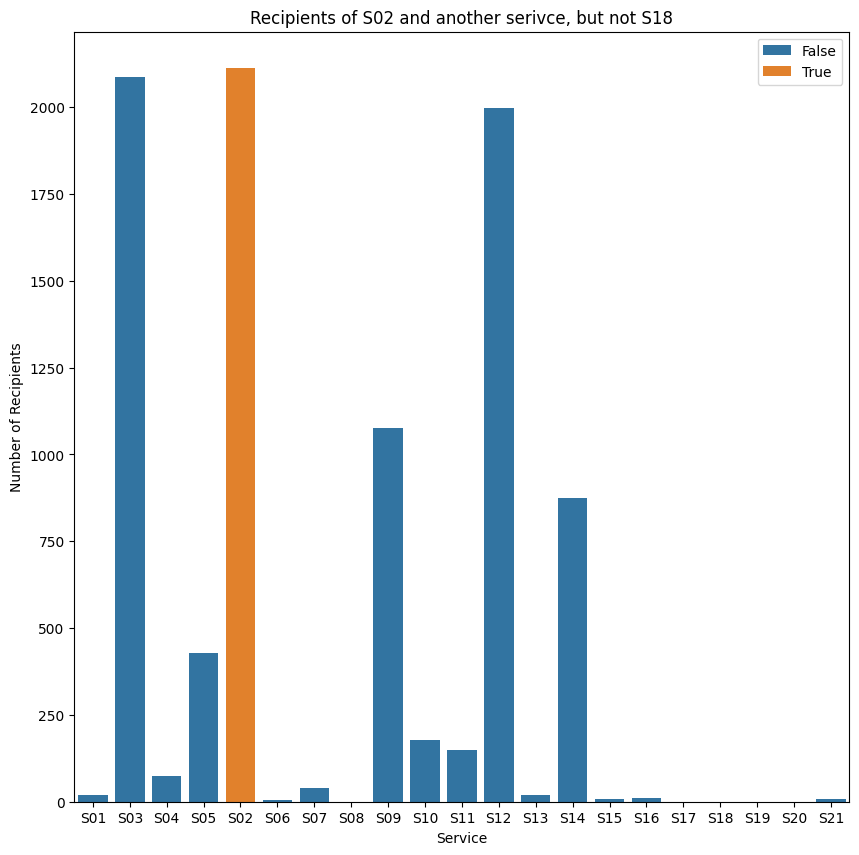

In [234]:
list_S02_servs = get_sum_associated_servs(cohort_S02_only_services)

plt.figure(figsize=(10,10))
sns.barplot(data=list_S02_servs, x=list_S02_servs.index,y='count', hue=list_S02_servs.index == 'S02')
plt.xlabel('Service')
plt.ylabel('Number of Recipients')
plt.title('Recipients of S02 and another serivce, but not S18')

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/308920222.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_cohort = cohort_services.groupby(["id","serv"]).agg(
/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/308920222.py:7: FutureWarning: The provided callable <function sum at 0x106808900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_serv_cohort = df_temp_cohort.pivot_table(


Text(0.5, 1.0, 'Recipients of S18 and another serivce, but not S02')

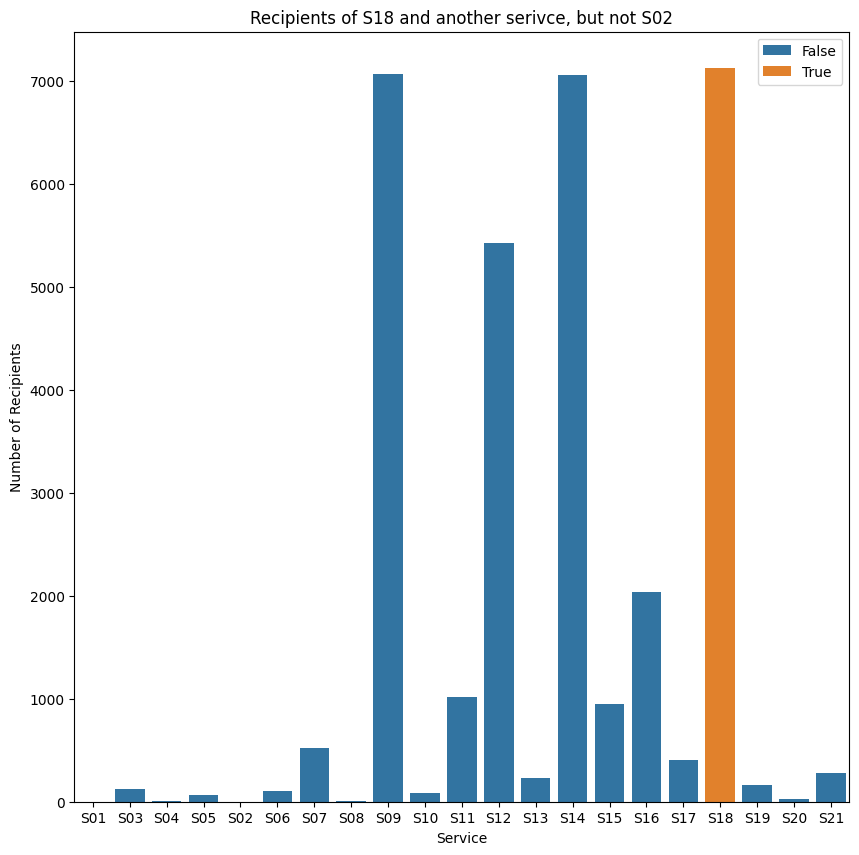

In [233]:
list_S18_servs = get_sum_associated_servs(cohort_S18_only_services)

plt.figure(figsize=(10,10))
sns.barplot(data=list_S18_servs, x=list_S18_servs.index,y='count', hue = list_S18_servs.index == 'S18')
plt.xlabel('Service')
plt.ylabel('Number of Recipients')
plt.title('Recipients of S18 and another serivce, but not S02')

/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/308920222.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_cohort = cohort_services.groupby(["id","serv"]).agg(
/var/folders/99/6591xgpn4sq1ypfgnrzy_7n80000gn/T/ipykernel_88204/308920222.py:7: FutureWarning: The provided callable <function sum at 0x106808900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_serv_cohort = df_temp_cohort.pivot_table(


Text(0.5, 1.0, 'Recipients of other services in conjunction with S02 and S18')

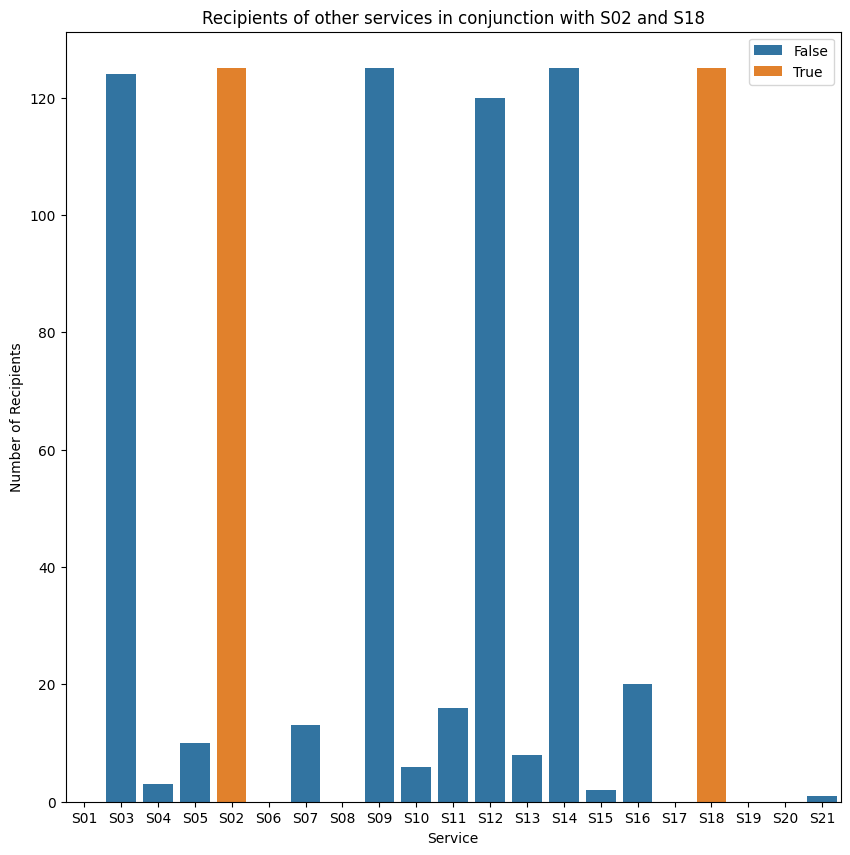

In [235]:
list_S18andS02_servs = get_sum_associated_servs(cohort_S02_and_S18_services)

plt.figure(figsize=(10,10))
sns.barplot(data=list_S18andS02_servs, x=list_S18andS02_servs.index,y='count', hue = list_S18andS02_servs.index.isin(['S02', 'S18']))
plt.xlabel('Service')
plt.ylabel('Number of Recipients')
plt.title('Recipients of other services in conjunction with S02 and S18')


The visualizations show that there are some services that are common across each cohort. The first visualization shows that for recipients of S02 but not S18, S12 and S03 were far more common than other services. Similarly, the second visualization shows that the S09, S12, and S14 were common across the cohort of recipients of S18 but not S02. Not surprisingly, for recipients of S02 and S18, services S03, S09, S12, and S14 are all common. 